In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('/home/roger/gekkoProjects/gekkothesis/Data_Backup/dataset.csv')

In [3]:
df.shape

(25193, 7)

In [4]:
reduced_list_of_words_df = pd.read_csv('/home/roger/gekkoProjects/gekkothesis/Data_Backup/reduced_list_of_words.csv')
reduced_list_of_words = list(reduced_list_of_words_df['reduced_list_of_words'])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(reduced_list_of_words)
df['token'] = label_encoder.transform(df['token'])

In [5]:
"""
true_df = df[df['class'] == False]
false_df = df[df['class'] == True]
n_true_rows = true_df.shape[0]
false_df = false_df.sample(n=n_true_rows)
df = true_df.append(false_df, ignore_index=True)
df = df.sample(frac=1)  # shuffle
"""

"\ntrue_df = df[df['class'] == False]\nfalse_df = df[df['class'] == True]\nn_true_rows = true_df.shape[0]\nfalse_df = false_df.sample(n=n_true_rows)\ndf = true_df.append(false_df, ignore_index=True)\ndf = df.sample(frac=1)  # shuffle\n"

In [6]:
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10024, random_state=0)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [7]:
model = RandomForestClassifier(n_estimators=81, max_features='sqrt', max_depth=108)

In [8]:
set_sizes = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050]
train_sizes, train_scores, validation_scores = learning_curve(model, X, y, train_sizes=set_sizes, cv=5, scoring='accuracy')

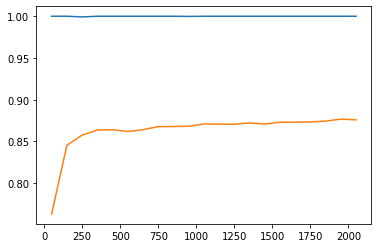

In [9]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

In [10]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)

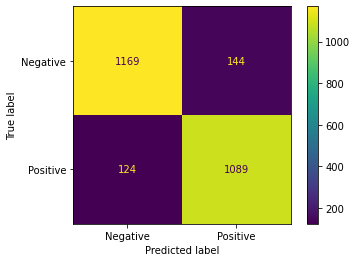

In [12]:
class_names = ['Negative', 'Positive']
disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_names
    )
disp.plot()
plt.show()

In [13]:
recall = recall_score(y_test, y_pred)
print('recall ' + str(recall))
print(len(y_test))

recall 0.8977741137675186
2526


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.955


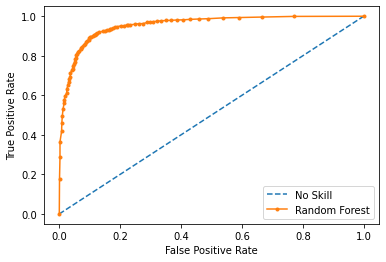

In [14]:
"""
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
"""

ns_probs = [0 for _ in range(len(y_test))]

lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [15]:
positive_count = 0
for i in range(len(y_test)):
    if y_pred[i] == True:
        positive_count += 1

In [16]:
positive_count

1233

In [17]:
positive_count / len(y_pred)

0.48812351543942994